In [1]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Welcome!')

Welcome!


In [2]:
df=pd.read_csv(r'Downloads\y_train.csv')

In [3]:
df

,Process Injection,Access Token Manipulation,Hijack Execution Flow,Data from Local System,Data Manipulation,Network Sniffing,duration,Phishing,protocol_type,service,Valid Accounts,Create Account,Stage Capabilities,Attack,level
0,0,0,0,0,0,0,0,0,tcp,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,udp,0,0,0,0,0,11
2,1,0,0,0,0,0,0,0,tcp,0,0,0,0,0,32
3,0,0,0,0,1,0,0,0,tcp,0,0,0,0,0,65
4,1,0,0,0,0,0,1,0,udp,0,0,0,0,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,1,0,0,0,0,0,1,0,tcp,0,0,0,0,0,0
1344,1,0,0,0,0,0,1,0,tcp,0,0,0,0,0,0
1345,0,0,0,0,0,0,0,0,udp,0,0,0,0,0,0
1346,0,0,0,0,0,0,1,0,http,0,0,0,0,0,0


In [4]:
df.columns

Index(['Process Injection', 'Access Token Manipulation',
       'Hijack Execution Flow', 'Data from Local System', 'Data Manipulation',
       'Network Sniffing', 'duration', 'Phishing', 'protocol_type', 'service',
       'Valid Accounts', 'Create Account', 'Stage Capabilities', 'Attack',
       'level'],
      dtype='object')

In [5]:
df.shape

(1348, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Process Injection          1348 non-null   int64 
 1   Access Token Manipulation  1348 non-null   int64 
 2   Hijack Execution Flow      1348 non-null   int64 
 3   Data from Local System     1348 non-null   int64 
 4   Data Manipulation          1348 non-null   int64 
 5   Network Sniffing           1348 non-null   int64 
 6   duration                   1348 non-null   int64 
 7   Phishing                   1348 non-null   int64 
 8   protocol_type              1348 non-null   object
 9   service                    1348 non-null   int64 
 10  Valid Accounts             1348 non-null   int64 
 11  Create Account             1348 non-null   int64 
 12  Stage Capabilities         1348 non-null   int64 
 13  Attack                     1348 non-null   int64 
 14  level   

In [7]:
df.isnull().sum()

Process Injection            0
Access Token Manipulation    0
Hijack Execution Flow        0
Data from Local System       0
Data Manipulation            0
Network Sniffing             0
duration                     0
Phishing                     0
protocol_type                0
service                      0
Valid Accounts               0
Create Account               0
Stage Capabilities           0
Attack                       0
level                        0
dtype: int64

In [8]:
df.describe(include='object').T
df.dtypes

Process Injection             int64
Access Token Manipulation     int64
Hijack Execution Flow         int64
Data from Local System        int64
Data Manipulation             int64
Network Sniffing              int64
duration                      int64
Phishing                      int64
protocol_type                object
service                       int64
Valid Accounts                int64
Create Account                int64
Stage Capabilities            int64
Attack                        int64
level                         int64
dtype: object

In [9]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['protocol_type']= label_encoder.fit_transform(df['protocol_type'])
  
df['protocol_type'].unique()

array([4, 5, 1, 3, 0, 2])

In [10]:
x=df[['Process Injection','Access Token Manipulation','Hijack Execution Flow','Data from Local System','Data Manipulation','Network Sniffing','duration','Phishing','protocol_type','service','Valid Accounts','Create Account','Stage Capabilities','level']]

In [11]:
x

,Process Injection,Access Token Manipulation,Hijack Execution Flow,Data from Local System,Data Manipulation,Network Sniffing,duration,Phishing,protocol_type,service,Valid Accounts,Create Account,Stage Capabilities,level
0,0,0,0,0,0,0,0,0,4,0,0,0,0,1
1,0,0,0,0,0,0,0,0,5,0,0,0,0,11
2,1,0,0,0,0,0,0,0,4,0,0,0,0,32
3,0,0,0,0,1,0,0,0,4,0,0,0,0,65
4,1,0,0,0,0,0,1,0,5,0,0,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,1,0,0,0,0,0,1,0,4,0,0,0,0,0
1344,1,0,0,0,0,0,1,0,4,0,0,0,0,0
1345,0,0,0,0,0,0,0,0,5,0,0,0,0,0
1346,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [12]:
y=df[['Attack']]

In [13]:
y

,Attack
0,0
1,0
2,0
3,0
4,1
...,...
1343,0
1344,0
1345,0
1346,0


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [15]:
xtrain.shape

(1078, 14)

In [16]:
xtest.shape

(270, 14)

In [17]:
ytrain.shape

(1078, 1)

In [18]:
ytest.shape

(270, 1)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf =DecisionTreeClassifier() 
clf.fit(x,y)
ypred=clf.predict(xtest)
score=accuracy_score(ytest,ypred)
print(score)

0.8296296296296296


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
adaboost_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) 
clf.fit(x,y)
ypred=clf.predict(xtest)
score=accuracy_score(ytest,ypred)
print(score)

0.8296296296296296


In [21]:
prediction=clf.predict([[1,0,0,0,0,0,1,0,5,0,0,0,0,22]])

C:\Users\RECS-2\anaconda3\envs\new\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [22]:
print(prediction)

[1]


In [23]:
prediction=clf.predict([[0,0,0,0,1,0,0,0,4,0,0,0,0,65]])

C:\Users\RECS-2\anaconda3\envs\new\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
prediction

array([0], dtype=int64)

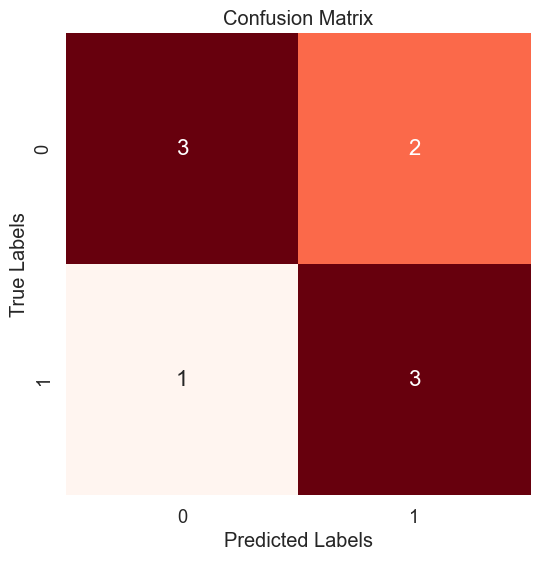

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace y_true and y_pred with your actual data
y_test = [0, 1, 0, 1, 1, 0, 0, 0, 1]
y_pred = [0, 0, 1, 1, 1, 0, 0, 1, 1]

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix with color changed to Reds
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

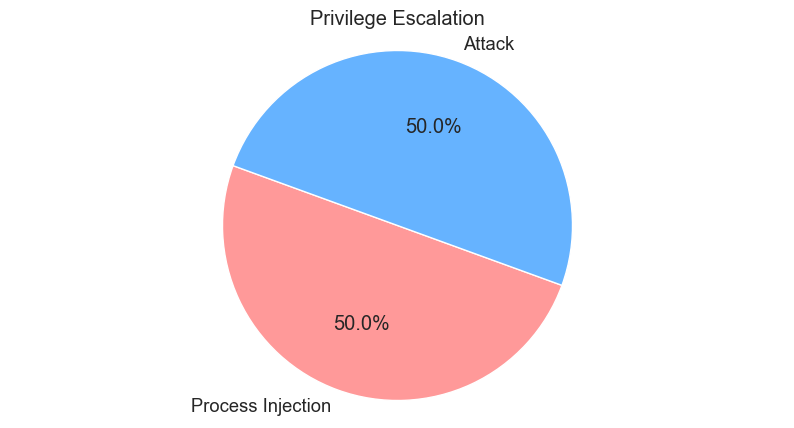

In [31]:
import matplotlib.pyplot as plt

# Sample data
df = ['Process Injection', 'Attack']
values = [1.0, 1.0]  # Corresponding percentages

# Custom colors for the pie chart slices
colors = ['#ff9999', '#66b3ff']  # Red and blue colors

# Create a pie chart with custom colors
plt.figure(figsize=(10, 5))
plt.pie(values, labels=df, autopct='%1.1f%%', startangle=160, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('Privilege Escalation')

# Display the pie chart
plt.show()

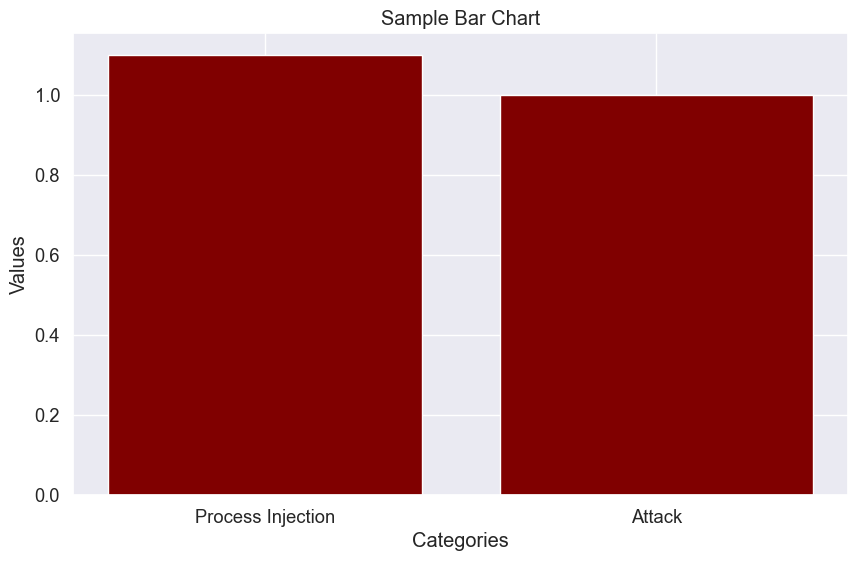

In [27]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Process Injection', 'Attack']
values = [1.1,1.0]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='MAROON')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Sample Bar Chart')

# Display the bar chart
plt.show()

In [28]:
import pickle

In [29]:
import os
import pickle
if os.path.isfile(r"Privilege-Escalation.pkl"):
    print("File Exists")
else:
    pickle.dump(clf,open(r'C:\Users\RECS-2\Desktop\ML Project\Privilege-Escalation\model.pkl','wb'))
    print("Model Loaded!")

Model Loaded!
